## 『本次練習內容』
#### 使用Xception backbone做 Trnasfer Learning


## 『本次練習目的』
  #### 了解如何使用Transfer Learning
  #### 了解Transfer Learning的優點，可以觀察模型收斂速度

##### 可以自行嘗試多種架構

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
import keras
from keras.layers import Input
 
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder


input_tensor = Input(shape=(32, 32, 3))
#include top 決定要不要加入 fully Connected Layer

'''Xception 架構'''

'''Resnet 50 架構'''
model=keras.applications.ResNet50(include_top=False, weights=r'C:\Users\User\data\resnet50\resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                    input_tensor=input_tensor,
                                    pooling=None, classes=10)
model.summary()


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

## 添加層數

In [14]:
x = model.output
x = GlobalAveragePooling2D()(x)
#x = Flatten()(x)
x = Dense(128, activation='relu')(x)   # output_dim 是keras 2 API
x = Dropout(0.1)(x)
predictions = Dense(10,activation='softmax')(x)
model = Model(inputs=model.input, outputs=predictions)
print('Model深度：', len(model.layers))


Model深度： 179


## 鎖定特定幾層不要更新權重

In [15]:
for layer in model.layers[:100]:
    layer.trainable = False
for layer in model.layers[100:]:
    layer.trainable = True

## 準備 Cifar 10 資料

In [16]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) #(50000, 32, 32, 3)

## Normalize Data
def normalize(X_train, X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7)
        return X_train, X_test
    
    
## Normalize Training and Testset    
x_train, x_test = normalize(x_train, x_test) 

## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()
y_test=one_hot.transform(y_test).toarray()

(50000, 32, 32, 3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


## Training

In [19]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
History= model.fit(x_train,y_train, batch_size=100,epochs=20, validation_split=0.2 )

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 35s 887us/step - loss: 0.6326 - accuracy: 0.7813 - val_loss: 4.8253 - val_accuracy: 0.1000
Epoch 2/20
40000/40000 [==============================] - 27s 677us/step - loss: 0.4491 - accuracy: 0.8446 - val_loss: 6.0786 - val_accuracy: 0.1046
Epoch 3/20
40000/40000 [==============================] - 28s 693us/step - loss: 0.3087 - accuracy: 0.8973 - val_loss: 7.3055 - val_accuracy: 0.1069
Epoch 4/20
40000/40000 [==============================] - 28s 692us/step - loss: 0.2416 - accuracy: 0.9221 - val_loss: 7.7960 - val_accuracy: 0.1225
Epoch 5/20
40000/40000 [==============================] - 28s 701us/step - loss: 0.1685 - accuracy: 0.9423 - val_loss: 6.5799 - val_accuracy: 0.1266
Epoch 6/20
40000/40000 [==============================] - 28s 688us/step - loss: 0.1358 - accuracy: 0.9571 - val_loss: 8.3923 - val_accuracy: 0.1103
Epoch 7/20
40000/40000 [==============================] 

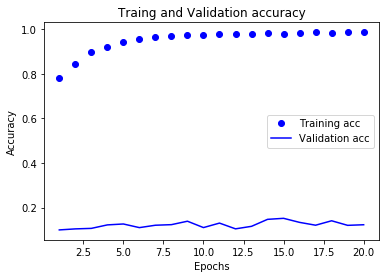

In [23]:
import matplotlib.pyplot as plt


history_dict = History.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs= range(1,len(acc)+1)
plt.plot(epochs, acc,'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Traing and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Training 很快就過擬合了~~